Import training and testing data for the rating head task.

{train, test}_images: contains the path of each image
{train, test}_scores: contains the user ratings of each image


In [1]:
import tensorflow as tf
import csv

data_folder = '../../Calista/website-aesthetics-datasets-master/rating-based-dataset/preprocess/'

train_data_path = data_folder + 'train_means_list.csv'
test_data_path = data_folder + 'test_list.csv'
images_path = data_folder + 'resized'

def get_scores(scores_path):

    images = []
    scores = []

    with open(scores_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0

        for row in csv_reader:
            if line_count == 0:

                line_count += 1
            else:

                scores.append(float(row[1]))
                line_count += 1
                image_name = row[0]

                images.append(images_path + image_name)

    return (images, scores)

train_images, train_scores = get_scores(train_data_path)
test_images, test_scores = get_scores(test_data_path)

2024-07-04 15:40:16.498468: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 15:40:16.498507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 15:40:16.499545: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-04 15:40:16.505034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 15:40:17.117094: W tensorflow/compiler/tf2

Shuffle the training set

In [2]:
import random
import numpy as np

# np.random.seed(2000)

temp = list(zip(train_images, train_scores))
random.shuffle(temp)

train_images, train_scores = zip(*temp)


Display the first 3 images to make sure everything is ok.

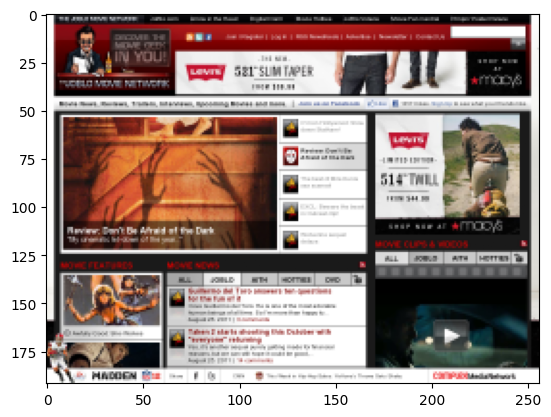

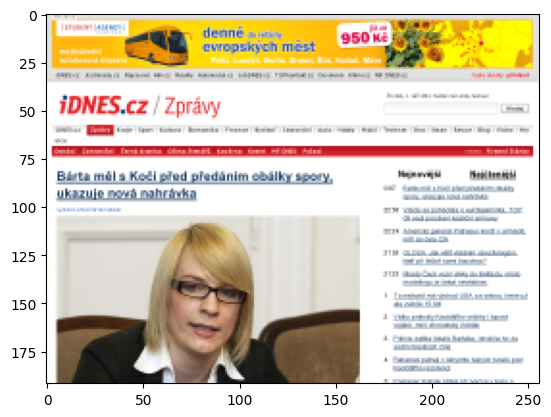

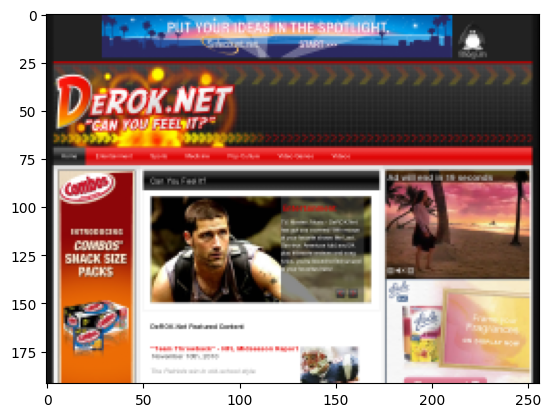

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mping
for ima in train_images[0:3]:
  img = mping.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

Read the images as numpy arrays

In [4]:
import cv2

width = 256
height = 192
channels = 3

def read_and_process_images(list_of_images):
  X = []

  for image in list_of_images:

    # images are already resized
    # X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (width, height),
    #                     interpolation=cv2.INTER_AREA))

    X.append(cv2.imread(image, cv2.IMREAD_COLOR))

  return X


X_train = np.array(read_and_process_images(train_images))
y_train = np.array(train_scores)

X_val = np.array(read_and_process_images(test_images))
y_val = np.array(test_scores)

Display the first 3 images to make sure everything is ok

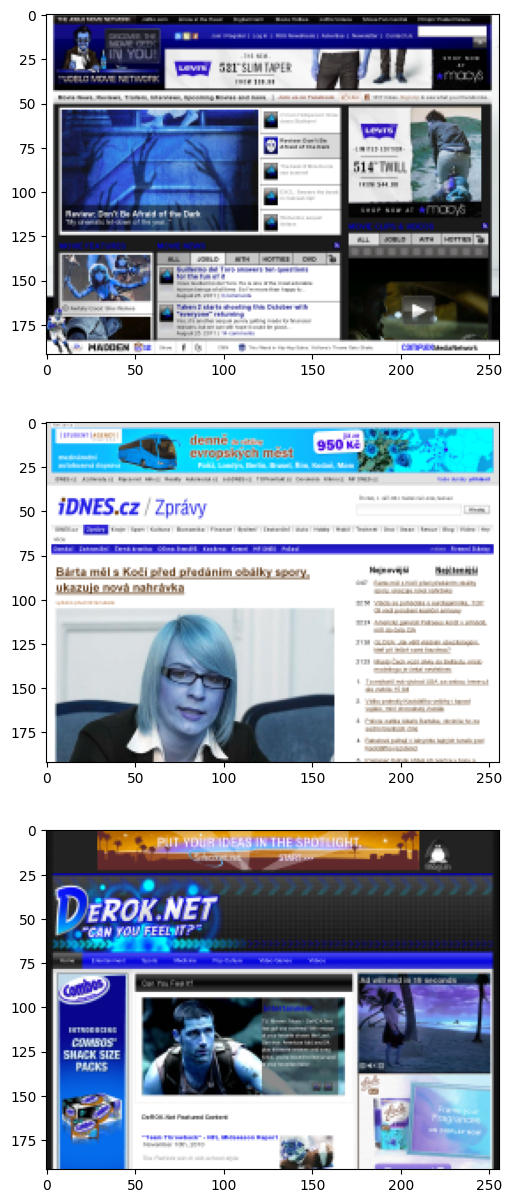

In [5]:
plt.figure(figsize=(25,15))
columns = 3

for i in range(columns):
  plt.subplot(columns, 1, i+1)
  plt.imshow(X_train[i])

Display shapes to check everything is ok

In [6]:
ntrain = len(X_train)
nval = len(X_val)

print('Shape of rating_X_train is: ', X_train.shape)
print('Shape of rating_X_val is: ', X_val.shape)
print('Shape of rating_y_train is: ', y_train.shape)
print('Shape of rating_y_val is: ', y_val.shape)

Shape of rating_X_train is:  (300, 192, 256, 3)
Shape of rating_X_val is:  (98, 192, 256, 3)
Shape of rating_y_train is:  (300,)
Shape of rating_y_val is:  (98,)


Import training and testing data for the comparison head task.

{train, test}_image_pairs: contains the path of each pair of images
{train, test}_labels: contains the labels of each image image, indicating the more aesthetic one.


In [7]:
import os
# New image map folder paths
image_map_folder = 'image_map/'
train_pairs_csv = image_map_folder + 'train_image_pairs.csv'
test_pairs_csv = image_map_folder + 'test_image_pairs.csv'

# Function to get image pairs and labels from CSV
def get_image_pairs_and_labels(pairs_csv_path):
    image_pairs = []
    labels = []
    with open(pairs_csv_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Skip header
        for row in csv_reader:
            image_path1 = row[0]
            image_path2 = row[1]
            label = int(row[2])
            image_pairs.append((image_path1, image_path2))
            labels.append(label)
    return image_pairs, labels

# Get training and testing image pairs and labels
train_image_pairs, train_labels = get_image_pairs_and_labels(train_pairs_csv)
test_image_pairs, test_labels = get_image_pairs_and_labels(test_pairs_csv)

# Print some samples to verify
# print(f"Training images: {train_images[:5]}")
# print(f"Training scores: {train_scores[:5]}")
# print(f"Training image pairs: {train_image_pairs[:5]}")
# print(f"Training labels: {train_labels[:5]}")
# print(f"Testing images: {test_images[:5]}")
# print(f"Testing scores: {test_scores[:5]}")
# print(f"Testing image pairs: {test_image_pairs[:5]}")
# print(f"Testing labels: {test_labels[:5]}")

# print(f"Training pairs: {len(train_image_pairs)}")
# print(f"Testing pairs: {len(test_image_pairs)}")
# print(f"image pairs : ", image_pairs)
# print(f"Testing labels : ", pairs_labels)


Shuffle the comparison training set

In [8]:

temp = list(zip(train_image_pairs, train_labels))
random.shuffle(temp)

train_image_pairs, train_labels = zip(*temp)

# print(f"train_labels: {train_labels}")

Display the first 3 pairs to make sure everything is ok.

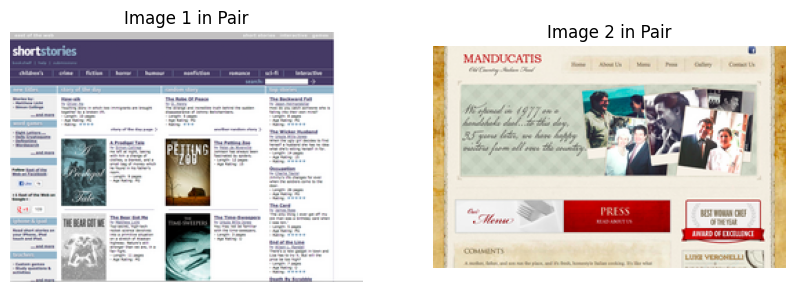

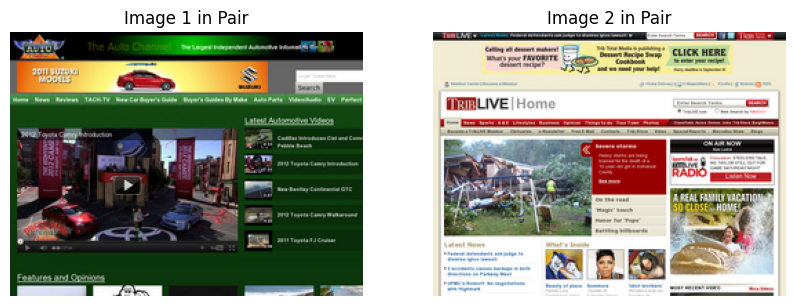

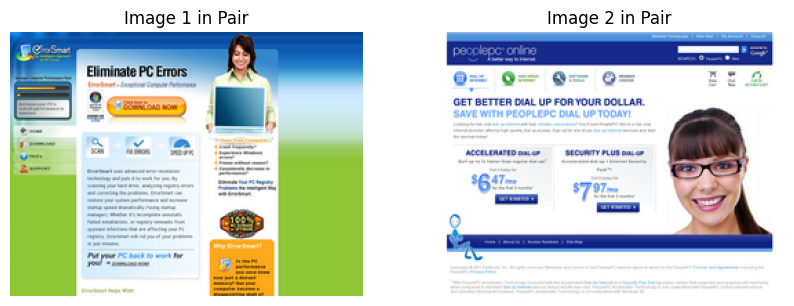

In [9]:

# for pair in train_image_pairs[0:3]:
#     print(pair[0])
#     print(pair[1])


  # Display 3 random pairs of images side by side
for pair in train_image_pairs[:3]:
    img1 = mping.imread(pair[0])  # Read the first image in the pair
    img2 = mping.imread(pair[1])  # Read the second image in the pair

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first image on the first subplot
    axs[0].imshow(img1)
    axs[0].set_title('Image 1 in Pair')
    axs[0].axis('off')  # Hide axes

    # Plot the second image on the second subplot
    axs[1].imshow(img2)
    axs[1].set_title('Image 2 in Pair')
    axs[1].axis('off')  # Hide axes

    # Display the plot
    plt.show()

Read the images as numpy arrays

In [10]:
def read_and_process_image_pairs(list_of_image_pairs):
    X = []

    for image1, image2 in list_of_image_pairs:
        img1 = cv2.imread(image1, cv2.IMREAD_COLOR)
        img2 = cv2.imread(image2, cv2.IMREAD_COLOR)

        #  Resize images if needed
        img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_AREA)
        img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_AREA)

        X.append((img1, img2))

    return X

 # Process training image pairs
X_pairs_train = read_and_process_image_pairs(train_image_pairs)
y_pairs_train = np.array(train_labels)

# Process validation image pairs
X_pairs_val = read_and_process_image_pairs(test_image_pairs)
y_pairs_val = np.array(test_labels)

In [11]:
# # type(train_image_pairs)
# train_image_pairs[-10][0].shape
# X_pairs_train[-10][0].shape, X_pairs_train[-10][1].shape

# plt.imshow(X_pairs_train[-10][0])
# plt.show()
# img1 = cv2.resize(X_pairs_train[-10][0], (width, height), interpolation=cv2.INTER_AREA)
# plt.imshow(img1) 
# plt.show()

Display the first 3 images to make sure everything is okay

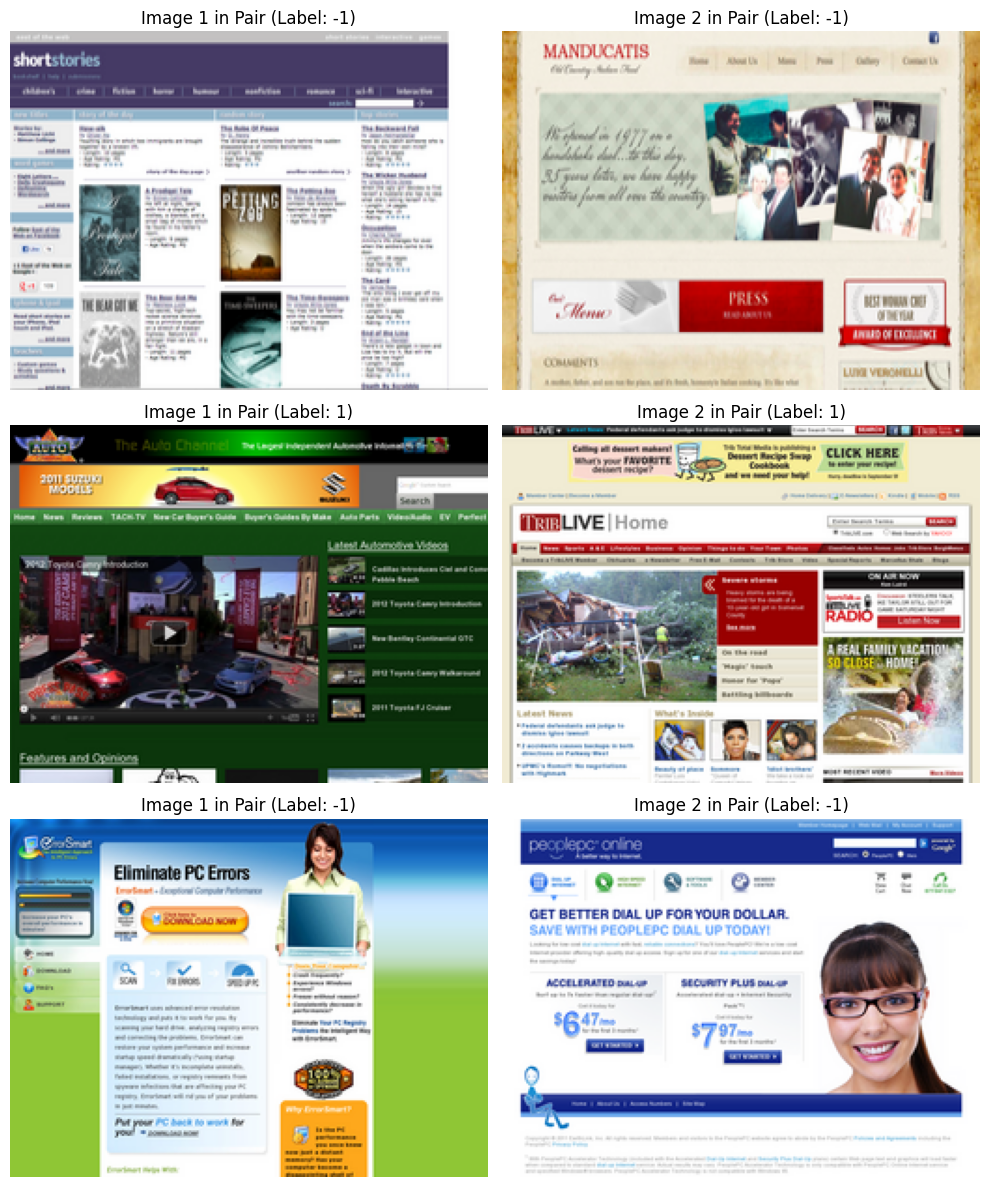

In [12]:
# Number of pairs to display
num_pairs_to_display = 3

# Create subplots
fig, axes = plt.subplots(num_pairs_to_display, 2, figsize=(10, 4 * num_pairs_to_display))

for i in range(num_pairs_to_display):
    img1, img2 = X_pairs_train[i]
    label = y_pairs_train[i]

    # Display the first image in the pair
    axes[i, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'Image 1 in Pair (Label: {label})')
    axes[i, 0].axis('off')

    # Display the second image in the pair
    axes[i, 1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f'Image 2 in Pair (Label: {label})')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

Get the weights of the pretrained model. This model is pretrained on the Flickr style dataset (containing 80 K images) for image style recognition task. It aims at the artistic aspect recognition of photographs and it is fine-tuned from another network which has been pretrained on the ImageNet dataset for object recognition task.

In [13]:
# import tensorflow as tf
# import keras
# print("TensorFlow version:", tf.__version__)
# print("Keras version:", keras.__version__)
# from keras import layers
# from keras import models
# from keras import optimizers
# from keras import regularizers
# from keras import initializers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import img_to_array, load_img

# from tensorflow.keras import layers, models, optimizers, regularizers, initializers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import h5py

def traverse_datasets(hdf_file):

    def h5py_dataset_iterator(g, prefix=''):
        for key in g.keys():
            item = g[key]
            path = f'{prefix}/{key}'    
            if isinstance(item, h5py.Dataset): # test for dataset
                yield (path, item)
            elif isinstance(item, h5py.Group): # test for group (go down)
                yield from h5py_dataset_iterator(item, path)

    with h5py.File(hdf_file, 'r') as f:
        for path, _ in h5py_dataset_iterator(f):
            yield path

weights = {}
filename = '../../Calista/pretrainedModels/flickr_style.h5'

with h5py.File(filename, 'r') as f:
    for dset in traverse_datasets(filename):
        print('Path:', dset)
        # print('Shape:', f[dset].shape)
        # print('Data type:', f[dset].dtype)
        weights[dset] = f[dset][:]

conv1_bias = weights['/conv1/conv1/bias:0']
conv1_kernel = weights['/conv1/conv1/kernel:0']
conv2_bias = weights['/conv2/conv2/bias:0']
conv2_kernel = weights['/conv2/conv2/kernel:0']
conv3_bias = weights['/conv3/conv3/bias:0']
conv3_kernel = weights['/conv3/conv3/kernel:0']
conv4_bias = weights['/conv4/conv4/bias:0']
conv4_kernel = weights['/conv4/conv4/kernel:0']
conv5_bias = weights['/conv5/conv5/bias:0']
conv5_kernel = weights['/conv5/conv5/kernel:0']


Path: /conv1/conv1/bias:0
Path: /conv1/conv1/kernel:0
Path: /conv2/conv2/bias:0
Path: /conv2/conv2/kernel:0
Path: /conv3/conv3/bias:0
Path: /conv3/conv3/kernel:0
Path: /conv4/conv4/bias:0
Path: /conv4/conv4/kernel:0
Path: /conv5/conv5/bias:0
Path: /conv5/conv5/kernel:0
Path: /fc6/fc6/bias:0
Path: /fc6/fc6/kernel:0
Path: /fc7/fc7/bias:0
Path: /fc7/fc7/kernel:0
Path: /fc8_flickr/fc8_flickr/bias:0
Path: /fc8_flickr/fc8_flickr/kernel:0


Construct the CNN.

In [14]:
from shared_feature_extractor import create_shared_feature_extractor
from rating_model import create_ratingModel
from comparison_model import create_comparisonModel
from tensorflow import keras
from keras import models
# import tensorflow as tf


# input_shape = (192, 256, 3)
shared_feature_extractor = create_shared_feature_extractor()

rating_model = create_ratingModel(shared_feature_extractor)
# rating_model_output = create_ratingModel(shared_feature_extractor)
input_a, input_b, comparison_model = create_comparisonModel(shared_feature_extractor)

2024-07-04 15:40:24.693080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-04 15:40:24.724203: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-04 15:40:24.724375: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Call the function to construct the joint-training model.

In [15]:
# joint_model = models.Model(
#     inputs=[shared_feature_extractor.input, input_a, input_b],
#     outputs=[rating_model_output, comparison_model_output],
#     name='joint_model'
# )

joint_model = models.Model(
    inputs=[shared_feature_extractor.input, input_a, input_b],
    outputs=[rating_model.output, comparison_model.output],
    name='joint_model'
)

# rating_model = models.Model(inputs=shared_feature_extractor.input, outputs=rating_model_output, name='rating_model')
# comparison_model = models.Model(inputs=[input_a, input_b], outputs=comparison_model_output, name='comparison_model')

Initialize the weights of the first 5 convolutional layers of the models with the weights of the pretrained model.

In [16]:
shared_feature_extractor.get_layer('conv1').set_weights([conv1_kernel[:, :, :, :], conv1_bias[:]])
shared_feature_extractor.get_layer('conv2_1').set_weights([conv2_kernel[:, :, :, :128], conv2_bias[:128]])
shared_feature_extractor.get_layer('conv2_2').set_weights([conv2_kernel[:, :, :, 128:], conv2_bias[128:]])
shared_feature_extractor.get_layer('conv3').set_weights([conv3_kernel[:, :, :, :], conv3_bias[:]])
shared_feature_extractor.get_layer('conv4_1').set_weights([conv4_kernel[:, :, :, :192], conv4_bias[:192]])
shared_feature_extractor.get_layer('conv4_2').set_weights([conv4_kernel[:, :, :, 192:], conv4_bias[192:]])
shared_feature_extractor.get_layer('conv5_1').set_weights([conv5_kernel[:, :, :, :128], conv5_bias[:128]])
shared_feature_extractor.get_layer('conv5_2').set_weights([conv5_kernel[:, :, :, 128:], conv5_bias[128:]])

# rating_model.summary()
# comparison_model.summary()
joint_model.summary()


Model: "joint_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 im_data (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 46, 62, 96)           34944     ['im_data[0][0]']             
                                                                                                  
 pool1 (MaxPooling2D)        (None, 23, 31, 96)           0         ['conv1[0][0]']               
                                                                                                  
 norm1 (LRN)                 (None, 23, 31, 96)           0         ['pool1[0][0]']               
                                                                                        

Define the loss functions (Euclidean Distance Loss and Bradley-Terry based loss)  and the metric (RMSE) that will be used

In [17]:
# Custom RMSE function for rating output
def rating_rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true), axis=-1))

# Custom accuracy function for the comparison output 
def custom_binary_accuracy(y_true, y_pred):
    # Use 0.0 as the threshold for tanh output
    y_pred = tf.where(y_pred >= 0.0, 1.0, -1.0)  # Convert predictions to 1 or -1
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))

# def euclidean_distance_loss(y_true, y_pred):
#     y_true = tf.cast(y_true, tf.float32)
#     y_pred = tf.cast(y_pred, tf.float32)
#     return 0.5 * tf.reduce_mean(tf.square(y_pred - y_true), axis=-1)

# Define the regression loss for the aesthetic rating task (mean squared error)
def mse_regression_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Define the Bradley-Terry based loss for the comparison task
def bradley_terry_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.reduce_mean(tf.math.log(1 + tf.exp(-y_true * y_pred)))


Define the combined loss function of the model

In [18]:
# Combined loss function
def combined_loss(y_true, y_pred, alpha=0.5):
    # Split y_true and y_pred
    y_true_rating = y_true[0]
    y_true_comparison = y_true[1]
    y_pred_rating = y_pred[0]
    y_pred_comparison = y_pred[1]

    y_true_rating = tf.cast(y_true_rating, tf.float32)
    y_true_comparison = tf.cast(y_true_comparison, tf.float32)

    D_a = tf.cast(tf.size(y_true_rating), tf.float32)
    D_b = tf.cast(tf.size(y_true_comparison), tf.float32)

    loss_a = mse_regression_loss(y_true_rating, y_pred_rating)
    loss_p = bradley_terry_loss(y_true_comparison, y_pred_comparison)

    L_combined = alpha * (1 / D_a) * loss_a + (1 - alpha) * (1 / D_b) * loss_p
    return L_combined

def custom_combined_loss(y_true, y_pred):
    y_true_rating = y_true[0]
    y_true_comparison = y_true[1]
    y_pred_rating = y_pred[0]
    y_pred_comparison = y_pred[1]

    return combined_loss((y_true_rating, y_true_comparison), (y_pred_rating, y_pred_comparison), alpha=0.5)


Create a Data generator for the aesthetic ratings task

In [19]:
batch_size = 16
from data_generator import rating_data_generator


# Define the output signature for the rating generator
rating_output_signature = (
    tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
    tf.TensorSpec(shape=(None,), dtype=tf.float32)
)

# Create TensorFlow Dataset objects for rating task
rating_gen_train = tf.data.Dataset.from_generator(
    lambda: rating_data_generator(X_train, y_train, batch_size),
    output_signature=rating_output_signature
)

rating_gen_val = tf.data.Dataset.from_generator(
    lambda: rating_data_generator(X_val, y_val, batch_size),
    output_signature=rating_output_signature
) 
#repeat???

Create a Custom Data Generator for the comparison task

In [20]:
from data_generator import comparison_data_generator
# Define the output signature
comparison_output_signature = (
    (
        tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
    ),
    tf.TensorSpec(shape=(None,), dtype=tf.float32)
)

# Create TensorFlow Dataset objects
comparison_gen_train = tf.data.Dataset.from_generator(
    lambda: comparison_data_generator(X_pairs_train, y_pairs_train, batch_size),
    output_signature=comparison_output_signature
)

comparison_gen_val = tf.data.Dataset.from_generator(
    lambda: comparison_data_generator(X_pairs_val, y_pairs_val, batch_size),
    output_signature=comparison_output_signature
)

Create a combined generator that yields data for both tasks simultaneously



In [21]:
from data_generator import combined_data_generator

# Create the combined generators for training and validation
combined_gen_train = combined_data_generator(rating_gen_train, comparison_gen_train)
combined_gen_val = combined_data_generator(rating_gen_val, comparison_gen_val)


# Create TensorFlow Dataset objects for the combined generator
combined_gen_train = tf.data.Dataset.from_generator(
    lambda: combined_data_generator(rating_gen_train, comparison_gen_train, batch_size),
    output_signature=(
        (
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
        ),
        (
            tf.TensorSpec(shape=(None,), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )
    )
)

combined_gen_val = tf.data.Dataset.from_generator(
    lambda: combined_data_generator(rating_gen_val, comparison_gen_val, batch_size),
    output_signature=(
        (
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
        ),
        (
            tf.TensorSpec(shape=(None,), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )
    )
)
type(combined_gen_train)

tensorflow.python.data.ops.flat_map_op._FlatMapDataset

Compile the models. Use RMSE to measure performance.

In [22]:

# decay = 1e-4

epochs = 95
base_lr = 0.001
initial_learning_rate = base_lr
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

sgd = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)


# rating_model.compile(loss=euclidean_distance_loss , optimizer=sgd, metrics=[rmse])
# comparison_model.compile(loss=bradley_terry_loss, optimizer=adam_optimizer, metrics=[rmse])

# joint_model.compile(loss=custom_combined_loss, optimizer=sgd,
#                     metrics={
#     'rating_output' : [rating_rmse],
#     'comparison_output' : [custom_binary_accuracy]
#      })


Train the model.

In [25]:
# import math


#Combined loss function
def ONEPAIRLOSSCOMBINED(y_true, y_pred, alpha=0.5):
    # Split y_true and y_pred
    y_true_rating = y_true[0]
    y_true_comparison = y_true[1]
    y_pred_rating = y_pred[0]
    y_pred_comparison = y_pred[1]

    y_true_rating = tf.cast(y_true_rating, tf.float32)
    y_true_comparison = tf.cast(y_true_comparison, tf.float32)

    D_a = tf.cast(tf.size(y_true_rating), tf.float32)
    D_b = tf.cast(tf.size(y_true_comparison), tf.float32)

    loss_a = mse_regression_loss(y_true_rating, y_pred_rating)
    loss_p = bradley_terry_loss(y_true_comparison, y_pred_comparison)

    L_combined = alpha * (1 / D_a) * loss_a + (1 - alpha) * (1 / D_b) * loss_p
    return L_combined

def ONEPAIRLOSS(y_true, y_pred):
    print(f"y_true shape: {y_true.shape}")
    print(f"y_pred shape: {y_pred.shape}")

    y_true_rating = y_true[0]
    y_true_comparison = y_true[1]
    y_pred_rating = y_pred[0]
    y_pred_comparison = y_pred[1]

    return ONEPAIRLOSSCOMBINED((y_true_rating, y_true_comparison), (y_pred_rating, y_pred_comparison), alpha=0.5)


joint_model.compile(loss=ONEPAIRLOSS, optimizer=sgd,
                    metrics={
    'rating_output' : [rating_rmse],
    'comparison_output' : [custom_binary_accuracy]
     })


# # Create single image and label batch
# single_image = np.expand_dims(X_train[0], axis=0)  # Shape: (1, 192, 256, 3)
# single_label = np.expand_dims(y_train[0], axis=0)  # Shape: (1,)

# # Create single pair and label batch
# single_pair_images = np.expand_dims(X_pairs_train[0], axis=0)  # Shape: (1, 2, 192, 256, 3)
# single_pair_label = np.expand_dims(y_pairs_train[0], axis=0)  # Shape: (1,)

# # Separate the pair into two inputs
# single_pair_image_a = single_pair_images[:, 0, :, :, :]  # Shape: (1, 192, 256, 3)
# single_pair_image_b = single_pair_images[:, 1, :, :, :]  # Shape: (1, 192, 256, 3)


# Example specific images and labels
single_image = np.random.rand(192, 256, 3).astype(np.float32)  # Replace with your specific image
single_image_label = 1.0  # Replace with your specific label

pair_images = (np.random.rand(192, 256, 3).astype(np.float32), 
               np.random.rand(192, 256, 3).astype(np.float32))  # Replace with your specific pair of images
pair_label = 0.0  # Replace with your specific label

batch_size = 16


# # Debugging step to confirm shapes
# print(f"single_image shape: {single_image.shape}")
# print(f"single_pair_images shape: {single_pair_images.shape}")
# print(f"single_image shape: {single_image.shape}")
# print(f"single_pair_image_a shape: {single_pair_image_a.shape}")
# print(f"single_pair_image_b shape: {single_pair_image_b.shape}")
# print(f"single_label shape: {single_label.shape}")
# print(f"single_pair_label shape: {single_pair_label.shape}")

def single_image_rating_generator(image, label, batch_size):
    while True:
        batch_images = np.repeat(image[np.newaxis, :], batch_size, axis=0)
        batch_labels = np.repeat(label, batch_size)
        yield batch_images, batch_labels

def single_pair_comparison_generator(pair_images, label, batch_size):
    while True:
        batch_images_1 = np.repeat(pair_images[0][np.newaxis, :], batch_size, axis=0)
        batch_images_2 = np.repeat(pair_images[1][np.newaxis, :], batch_size, axis=0)
        batch_labels = np.repeat(label, batch_size)
        yield (batch_images_1, batch_images_2), batch_labels


def combined_single_data_generator(single_image, single_image_label, pair_images, pair_label, batch_size):
    rating_gen = single_image_rating_generator(single_image, single_image_label, batch_size)
    comparison_gen = single_pair_comparison_generator(pair_images, pair_label, batch_size)
    
    while True:
        rating_batch = next(rating_gen)
        comparison_batch = next(comparison_gen)
        
        combined_images = (
            rating_batch[0],
            comparison_batch[0][0],
            comparison_batch[0][1]
        )
        combined_labels = (
            rating_batch[1],
            comparison_batch[1]
        )
        yield combined_images, combined_labels


combined_gen_single = tf.data.Dataset.from_generator(
    lambda: combined_single_data_generator(single_image, single_image_label, pair_images, pair_label, batch_size),
    output_signature=(
        (
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
        ),
        (
            tf.TensorSpec(shape=(None,), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )
    )
)

history = joint_model.fit(
    combined_gen_single,
    steps_per_epoch=10,  # Generate more steps from augmented data
    epochs=epochs,
    validation_data=combined_gen_single,
    validation_steps=1
)

                                
# # Fit the model using the combined generator
# history = joint_model.fit(combined_gen_train,
#     steps_per_epoch = ntrain // batch_size,
#     epochs = epochs,
#     validation_data = combined_gen_val,
#     validation_steps = nval // batch_size)



# history = rating_model.fit(rating_gen_train,
#     steps_per_epoch = ntrain // batch_size,
#     epochs = epochs,
#     validation_data = rating_gen_val,
#     validation_steps = nval // batch_size)

# history = comparison_model.fit(comparison_gen_train,
#     steps_per_epoch = ntrain // batch_size,
#     epochs = epochs,
#     validation_data = comparison_gen_test,
#     validation_steps = nval // batch_size)


# -------------------------*--------------------------
# # Print history keys to see what metrics are recorded
# print(history.history.keys())

# # Access and print specific metrics
# print("Training Loss: ", history.history['loss'])
# print("Validation Loss: ", history.history['val_loss'])
# print("Training Rating Output RMSE: ", history.history['rating_output_rmse'])
# print("Validation Rating Output RMSE: ", history.history['val_rating_output_rmse'])


Epoch 1/95
y_true shape: (None, 1)
y_pred shape: (None, 1)
y_true shape: (None, 1)
y_pred shape: (None, 1)


y_true shape: (None, 1)
y_pred shape: (None, 1)
y_true shape: (None, 1)
y_pred shape: (None, 1)


2024-07-04 15:48:48.308256: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape injoint_model/dropout1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


10/10 [==============================] - ETA: 0s - loss: 4.7347 - rating_output_loss: 0.1486 - comparison_output_loss: 0.3466 - rating_output_rating_rmse: 0.1217 - comparison_output_custom_binary_accuracy: 0.0000e+00y_true shape: (None, 1)
y_pred shape: (None, 1)
y_true shape: (None, 1)
y_pred shape: (None, 1)
10/10 [==============================] - 4s 147ms/step - loss: 4.7347 - rating_output_loss: 0.1486 - comparison_output_loss: 0.3466 - rating_output_rating_rmse: 0.1217 - comparison_output_custom_binary_accuracy: 0.0000e+00 - val_loss: 4.7335 - val_rating_output_loss: 0.1484 - val_comparison_output_loss: 0.3466 - val_rating_output_rating_rmse: 0.1221 - val_comparison_output_custom_binary_accuracy: 0.0000e+00
Epoch 2/95
10/10 [==============================] - 1s 96ms/step - loss: 4.7325 - rating_output_loss: 0.1481 - comparison_output_loss: 0.3466 - rating_output_rating_rmse: 0.1217 - comparison_output_custom_binary_accuracy: 0.0000e+00 - val_loss: 4.7318 - val_rating_output_loss:

Display the learning curves of the rating task.


dict_keys(['loss', 'rating_output_loss', 'comparison_output_loss', 'rating_output_rating_rmse', 'comparison_output_custom_binary_accuracy', 'val_loss', 'val_rating_output_loss', 'val_comparison_output_loss', 'val_rating_output_rating_rmse', 'val_comparison_output_custom_binary_accuracy'])


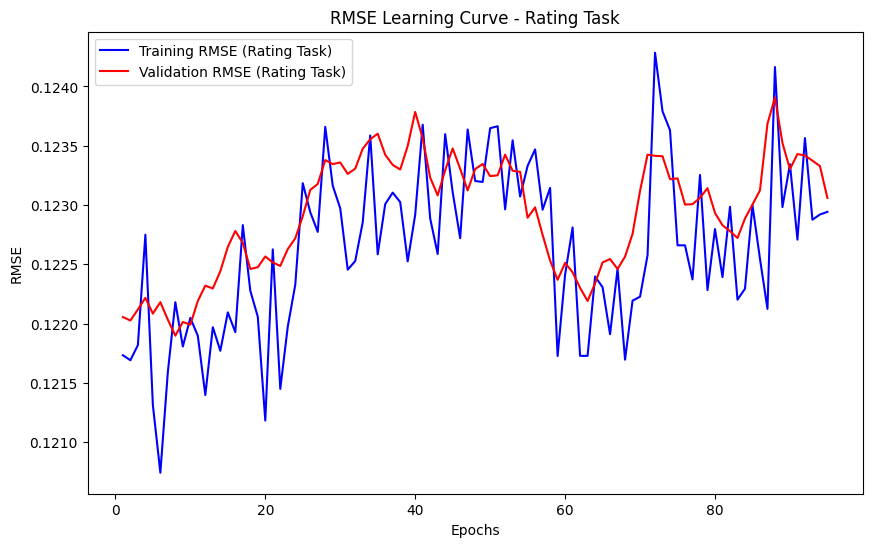

In [28]:
print(history.history.keys())

# Extract RMSE metrics from history
rating_rmse = history.history['rating_output_rating_rmse']
val_rating_rmse = history.history['val_rating_output_rating_rmse']

epochs_x = range(1, len(rating_rmse) + 1)

# Plot the RMSE learning curves for the rating task
plt.figure(figsize=(10, 6))
plt.plot(epochs_x, rating_rmse, 'b', label='Training RMSE (Rating Task)')
plt.plot(epochs_x, val_rating_rmse, 'r', label='Validation RMSE (Rating Task)')
plt.title('RMSE Learning Curve - Rating Task')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Plot both Heads simeltaneously
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(rating_rmse, label='Training RMSE')
# plt.plot(val_rating_rmse, label='Validation RMSE')
# plt.xlabel('Epochs')
# plt.ylabel('RMSE')
# plt.title('Rating RMSE')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(comparison_rmse, label='Training RMSE')
# plt.plot(val_comparison_rmse, label='Validation RMSE')
# plt.xlabel('Epochs')
# plt.ylabel('RMSE')
# plt.title('Comparison RMSE')
# plt.legend()

# plt.show()

Display the learning curves of the comparison task.

In [ ]:
# Extract RMSE metrics from history
comparison_rmse = history.history['comparison_rmse']
val_comparison_rmse = history.history['val_comparison_rmse']


epochs_x = range(1, len(comparison_rmse) + 1)

# Plot the RMSE learning curves for the comparison task
plt.figure(figsize=(12, 6))
plt.plot(epochs_x, comparison_rmse, 'b', label='Training RMSE (Comparison Task)')
plt.plot(epochs_x, val_comparison_rmse, 'r', label='Validation RMSE (Comparison Task)')
plt.title('RMSE Learning Curve - Comparison Task')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


Display the learning curves of the combined model.

Define a function that calculates Pearson correlation.

In [29]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''
    N = len(x)
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(N-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

Predict the scores for the images in the testing set. Display the predictions of the first 6 images.

In [ ]:
# Rating Model
rating_predictions = []

X_val = X_val / 255.0
for img in X_val:
  img = img.reshape(1, 192, 256, 3)
  pred = rating_model.predict(img)
  rating_predictions.append(float(pred))

rating_predictions = np.array(rating_predictions)


# Maybe this is useless, because we are going to predict rating scores, so the first model only may be needed.
# # Comparison Model
# comparison_predictions = []

# X_val = X_val / 255.0
# for img in X_val:
#   img = img.reshape(1, 192, 256, 3)
#   pred = rating_model.predict(img)
#   comparison_predictions.append(float(pred))

# comparison_predictions = np.array(comparison_predictions)

Display some websites of the test set and the predicted aesthetics score.

In [ ]:
image_ids = [87, 45, 49, 94, 14, 83] # test image IDs sorted in descending order according to the website's aesthetics level

fig = plt.figure(figsize=(12, 16))
i = 1
for id in image_ids:
  if 'english' in test_images[id]:
    path = images_path + '/english_resized/' + test_images[id].rsplit('/', 1)[1]
  else:
    path = images_path + '/foreign_resized/' + test_images[id].rsplit('/', 1)[1]

  plt.subplot(len(image_ids)//2, 2, i)
  img = mping.imread(path)
  plt.title('User average rating: ' + str(np.round(y_val[id],2)) + '\nPredicted rating: ' + str(np.round(rating_predictions[id],2)) + '\n(' + chr(97+i-1) + ')', y=-0.25)
  plt.axis('off')
  plt.imshow(img)

  i += 1

plt.show()

Create a scatterplot to check the relationship between ground truth and predicted scores.

In [ ]:
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(y_val, rating_predictions, 1)

fig = plt.figure()
plt.scatter(y_val, rating_predictions, c='c')
plt.plot(y_val, b + m * y_val, '-', c='b')
plt.xlabel('User ratings')
plt.ylabel('Predicted ratings')

plt.show()

Calculate the Pearson correlation and the RMSE between ground truth and predicted scores.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

corr, p, lo, hi = pearsonr_ci(y_val, rating_predictions)
print('Pearsons correlation: r=%.2f, p=%.2e, CI=[%.2f, %.2f]' % (corr, p, lo, hi))
rmse_test = sqrt(mean_squared_error(y_val, rating_predictions))
print('RMSE: %.3f' % rmse_test)

Plot the distribution of ground truth scores and the distribution of predictions.

In [ ]:
import seaborn as sns

fig = plt.figure()
sns.set(color_codes=True)

bins = np.linspace(1, 9, num=15)

sns.displot(y_val, bins=bins, label='User ratings', kde=True)

sns.displot(rating_predictions, bins=bins, label='Predicted ratings', kde=True)

plt.legend()

plt.show()
